# Analysis of the data - first look and what to do

In [1]:
# Import stuff
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

## Load the data

In [216]:
data_path = './data/'  # This is where the data is stored
deloitte_path = data_path + 'carseg_data/'
array_path = deloitte_path + 'arrays/'  # Full path: data/carseg_data/arrays/

# Several image folders - mostly for visual inspection.
images_path = deloitte_path + 'images/'
car_photos_path = images_path + 'photo/'
black_5_doors_path = images_path + 'black_5_doors/'
orange_3_doors_path = images_path + 'orange_3_doors/'
landscapes_path = images_path + 'landscapes/'

## Visualise the data

In [217]:
# Get the 169 256x256x3 images and their corresponding ground truth
photo_imgs = glob.glob(car_photos_path + 'no_segmentation/'+ '*.jpg')
photo_imgs_gt = glob.glob(car_photos_path + 'with_segmentation/'+ '*.jpg')
photo_imgs.sort()
photo_imgs_gt.sort()
print(f"Number of photos: {len(photo_imgs)}")

Number of photos: 169


In [218]:
array_names = glob.glob(array_path + '*.npy')
array_names.sort()
print(f"Number of arrays: {len(array_names)}")

Number of arrays: 3004


In [225]:
black_arrays = []
orange_arrays = []
photo_arrays = []

for array in array_names:
    if 'black' in array:
        black_arrays.append(np.load(array))
    if 'orange' in array:
        orange_arrays.append(np.load(array))
    if 'photo' in array:
        photo_arrays.append(np.load(array))

black_arrays = np.array(black_arrays)
orange_arrays = np.array(orange_arrays)
photo_arrays = np.array(photo_arrays)


print(f"Number of black arrays: {len(black_arrays)}")
print(f"Number of orange arrays: {len(orange_arrays)}")
print(f"Number of photo arrays: {len(photo_arrays)}")
print(f"Total: {len(black_arrays) + len(orange_arrays) + len(photo_arrays)}")

Number of black arrays: 834
Number of orange arrays: 2001
Number of photo arrays: 169
Total: 3004


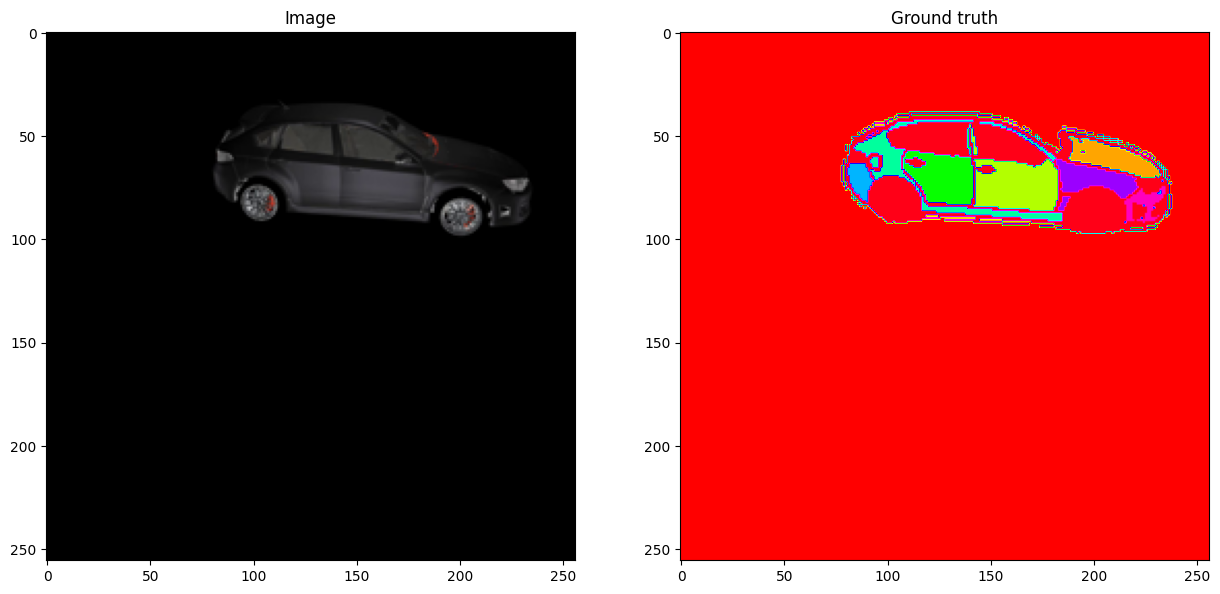

In [230]:
# Show the first image next to its ground truth
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].imshow(black_arrays[0][:,:,0:3])
ax[0].set_title('Image')
ax[1].imshow(black_arrays[0][:,:,3], cmap='hsv')  # Is hsv the right cmap? Best one I could find
ax[1].set_title('Ground truth')
plt.show()


## Classification meaning

| Color | Description | Class value |
| ------| ----------- | ----------- |
| original | not part of car | 0 |
| Orange | hood | 10 |
| dark green | front door | 20 |
| yellow | rear door | 30 |
| cyan | frame | 40 |
| purple | rear quarter panel | 50 |
| light green | trunk lid | 60 |
| blue | fender | 70 |
| pink | bumper | 80 |
| no colour | rest of car | 90 |


In [234]:
def classifyPixel(x, y, img):
    """
    Classify a pixel according to the ground truth
    """
    if img[x,y,3] == 0:
        print("Pixel not part of the car")
    elif img[x,y,3] == 10:
        print("Hood")
    elif img[x,y,3] == 20:
        print("Front door")
    elif img[x,y,3] == 30:
        print("Rear door")
    elif img[x,y,3] == 40:
        print("Frame")
    elif img[x,y,3] == 50:
        print("Rear quarter panel")
    elif img[x,y,3] == 60:
        print("Trunk lid")
    elif img[x,y,3] == 70:
        print("Fender")
    elif img[x,y,3] == 80:
        print("Bumper")
    elif img[x,y,3] == 90:
        print("Rest of car")
        

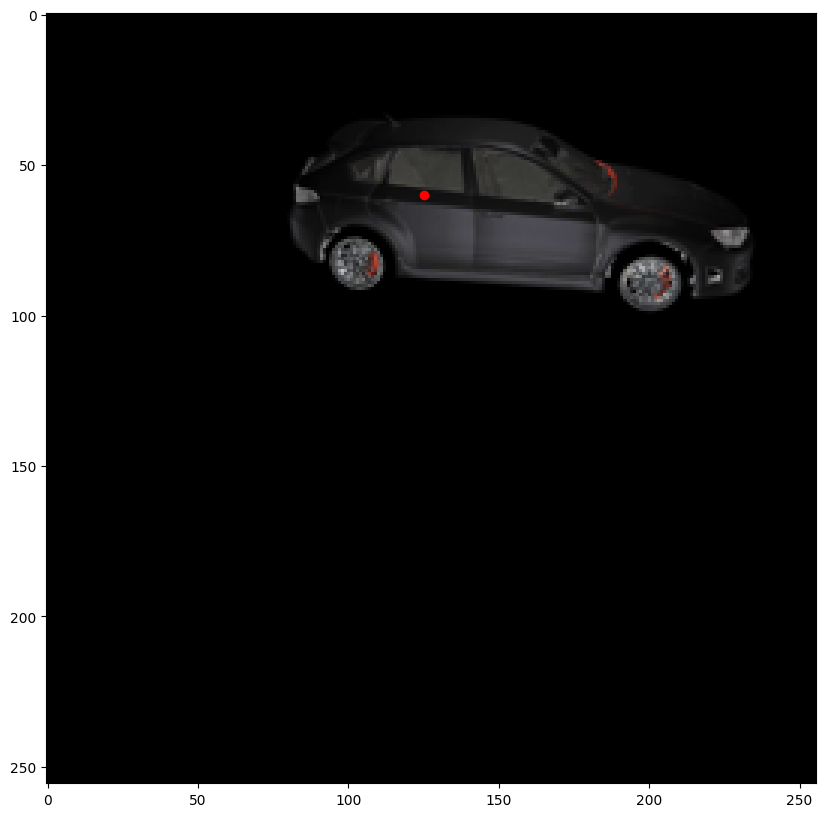

Rear door


In [236]:
# Display the pixel 60,125 in the original image with a red dot
x, y = 60, 125
img_n = 0
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.imshow(black_arrays[img_n][:,:,0:3])
ax.scatter(y, x, c='r')
plt.show()

# Classify the pixel
classifyPixel(x, y, black_arrays[0])